### Code to load dataset:

#### 1. Load Dataset
#### 2. Clean Dataset:
         2.1 Remove special characters
         2.2 Remove stop words
         2.3 Tokenize
         2.4 Perform Lemmitization
#### 3. Create Word Count
#### 4. Create Word Length Count
#### 5. Create Bar Charts for the above

In [1]:
## Load the FAQ DataSet

import pandas as pd
import numpy as np

df = pd.read_csv("faq_database.csv",header=0)

print("Dataset has: ",df.shape[0]," Questions")

print("\nDataset Sample: ")
df

Dataset has:  23  Questions

Dataset Sample: 


,Questions,Answers
0,How is data scientist different than data analyst,Data Science is a field which contains various...
1,What is regularisation? Explain L1 and L2 regu...,Regularisation is a mathematical way of solvin...
2,How do Data Scientists use statistics?,Statistics plays a powerful role in Data Scien...
3,What does the job hunting experience look like ?,Job hunting experience involves networking to...
4,Any insights you can offer about the DS job ma...,There are many kinds of roles data scientist ...
5,What?s the impact of Covid on hiring for DS ro...,Hiring is going to slow down. First in small c...
6,What skills and qualities do employers look fo...,The following are some skills employers usuall...
7,Do employers look for an advanced ML degree?,For more senior roles: People typically look f...
8,How does a typical day of a data scientist loo...,Here are some tasks in the typical day of a da...
9,Do I need to prepare algorithms and data struc...,Yes. In many data science interviews (ML Scien...


In [2]:
#Remove special characters and stopwords from the data

import re
import gensim
from gensim.parsing.preprocessing import remove_stopwords


def clean_sentence(sentence, stopwords=False):
    
    
    sentence = sentence.lower().strip()
    sentence = re.sub(r'[^a-z0-9\s]', '',sentence)
    
    if stopwords:
        sentence = remove_stopwords(sentence)
        
    return sentence
        
def get_cleaned_sentences(df,stopwords=False):
    sents = df[['Questions']];
    cleaned_sentences =[]
    
    for index,row in df.iterrows():
        cleaned = clean_sentence(row["Questions"],stopwords);
        cleaned_sentences.append(cleaned);
    return cleaned_sentences;

cleaned_sentences=get_cleaned_sentences(df,stopwords=True)
print("Sample of cleaned sentences: \n\n",cleaned_sentences[0]);
print("\n",cleaned_sentences[1])
print("\n",cleaned_sentences[2])
print("\n",cleaned_sentences[3])

print("\n")




Sample of cleaned sentences: 

 data scientist different data analyst

 regularisation explain l1 l2 regularisation

 data scientists use statistics

 job hunting experience look like




In [3]:
#Tokenization of sentences
#Creating word list and word length
#Ignoring 1 letter words

word_list = []
word_length_list =[]
        
for sentence in cleaned_sentences:
    words = sentence.split()
    for word in words:
        if len(word) > 1:
            word_list.append(word)
            word_length_list.append(len(word))

print(word_list[0:5])
print(word_length_list[0:5])

        

['data', 'scientist', 'different', 'data', 'analyst']
[4, 9, 9, 4, 7]


### Lemmitization

In [4]:
#Example of how lemmitization works:

from nltk.corpus import wordnet
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

#Create array of words and convert to base form


WordNetLemmatizer().lemmatize(word)
stemmer = SnowballStemmer("english")

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

sentence = "He was longing and eating at same time. He has bad habit of swimming after playing long hours in the Sun."
punctuations="?:!.,;"
sentence_words = nltk.word_tokenize(sentence)

for word in sentence_words:
    if word in punctuations:
        sentence_words.remove(word)

sentence_words
print("{0:20}{1:20}".format("Word","Lemma"))


for word in sentence_words:
    print ("{0:20}{1:20}".format(word,wordnet_lemmatizer.lemmatize(word, pos="v")))
    


Word                Lemma               
He                  He                  
was                 be                  
longing             long                
and                 and                 
eating              eat                 
at                  at                  
same                same                
time                time                
He                  He                  
has                 have                
bad                 bad                 
habit               habit               
of                  of                  
swimming            swim                
after               after               
playing             play                
long                long                
hours               hours               
in                  in                  
the                 the                 
Sun                 Sun                 


In [5]:
#Perform lemmitization of the dataset

from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from collections import defaultdict

tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

lmtzr = WordNetLemmatizer()
tokens = word_list[:]
word_list_lem =[]

for token, tag in pos_tag(tokens):
    word_list_lem.append(lmtzr.lemmatize(token, tag_map[tag[0]]))
    lemm = lmtzr.lemmatize(token, tag_map[tag[0]])
    
print(word_list[11:16])
print(word_list_lem[11:16])

['scientists', 'use', 'statistics', 'job', 'hunting']
['scientist', 'use', 'statistic', 'job', 'hunt']


### Word Count and Word Length Plots

In [6]:
#Print Total and Unique Word Counts:

print("Unique Words: ",len(np.unique(word_list_lem[:])))
print("Total Words: ",len(word_list_lem[:]))

Unique Words:  69
Total Words:  100


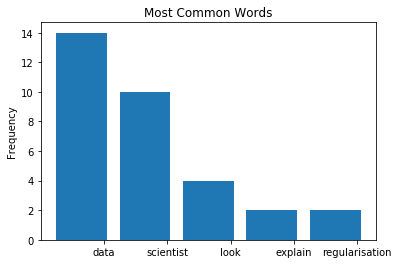

In [8]:
#Create Histogram for most common words:

from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

#For Most Common n words:
counts = dict(Counter(word_list_lem).most_common(5))

counts_length = Counter(word_list_lem)

labels, values = zip(*counts.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35

plt.bar(indexes, values)

# add labels
plt.xticks(indexes + bar_width, labels)
plt.title("Most Common Words")
plt.ylabel("Frequency")
plt.savefig("Bar_Chart1",bbox_inches='tight')
plt.show()

Counter({4: 24, 9: 15, 10: 13, 6: 12, 7: 8, 8: 7, 2: 6, 3: 4, 5: 4, 14: 2, 12: 2, 13: 2, 11: 1})


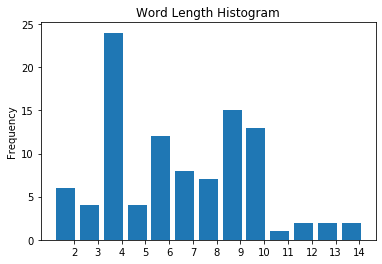

In [9]:
#Create Histogram of word length count

counts_length = Counter(word_length_list)
print(counts_length)

labels, values = zip(*counts_length.items())

# sort your values in descending order
indSort = np.argsort(labels)[::1]

# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35

plt.bar(indexes, values)

# add labels
plt.xticks(indexes + bar_width, labels)

plt.title("Word Length Histogram")
plt.ylabel("Frequency")

plt.savefig("Bar_Chart1",bbox_inches='tight')
plt.show()
